In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\omicron.csv")

In [4]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,5/18/2015 20:52,49,11,803,False,2/10/2022 18:22,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1.491840e+18,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,5/10/2009 23:01,639,1931,46369,False,2/10/2022 18:21,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,5/18/2015 20:52,49,11,803,False,2/10/2022 18:20,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1.491840e+18,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,5/18/2015 20:52,49,11,803,False,2/10/2022 18:19,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1.491840e+18,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,12/8/2009 16:41,375,284,61,False,2/10/2022 18:19,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False


In [5]:
data.shape

(17046, 16)

In [7]:
data.dtypes

id                  float64
user_name            object
user_location        object
user_description     object
user_created         object
user_followers        int64
user_friends          int64
user_favourites       int64
user_verified          bool
date                 object
text                 object
hashtags             object
source               object
retweets              int64
favorites             int64
is_retweet             bool
dtype: object

### data Cleaning

In [10]:
(data.isnull().mean()/len(data))*100

id                  0.000000
user_name           0.000000
user_location       0.001243
user_description    0.000458
user_created        0.000000
user_followers      0.000000
user_friends        0.000000
user_favourites     0.000000
user_verified       0.000000
date                0.000000
text                0.000000
hashtags            0.002350
source              0.000000
retweets            0.000000
favorites           0.000000
is_retweet          0.000000
dtype: float64

* dataset contains null values in three coloumns with less than 5% . so i will remove all the rows containing the null values

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7575 entries, 1 to 17045
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7575 non-null   float64
 1   user_name         7575 non-null   object 
 2   user_location     7575 non-null   object 
 3   user_description  7575 non-null   object 
 4   user_created      7575 non-null   object 
 5   user_followers    7575 non-null   int64  
 6   user_friends      7575 non-null   int64  
 7   user_favourites   7575 non-null   int64  
 8   user_verified     7575 non-null   bool   
 9   date              7575 non-null   object 
 10  text              7575 non-null   object 
 11  hashtags          7575 non-null   object 
 12  source            7575 non-null   object 
 13  retweets          7575 non-null   int64  
 14  favorites         7575 non-null   int64  
 15  is_retweet        7575 non-null   bool   
dtypes: bool(2), float64(1), int64(5), object(

In [14]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,7.575000e+03,7.575000e+03,7575.000000,7.575000e+03,7575.000000,7575.000000
mean,1.495337e+18,1.288245e+05,3211.965281,2.024555e+04,3.555776,10.169901
std,2.823968e+15,8.733824e+05,13139.225656,5.408639e+04,49.179975,115.297903
min,1.491240e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.493590e+18,3.005000e+02,188.000000,2.960000e+02,0.000000,0.000000
50%,1.494640e+18,1.514000e+03,600.000000,2.600000e+03,0.000000,1.000000
75%,1.496700e+18,7.720000e+03,2052.500000,1.563700e+04,1.000000,3.000000
max,1.501280e+18,1.678454e+07,386478.000000,1.023752e+06,2976.000000,5491.000000


### Sentiment Analysis of Omicron Variant

In [15]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating Function to clean the text coloumn

In [16]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

* As we have cleaned the text coloumn . We will have a look at the word cloud of the text coloumn

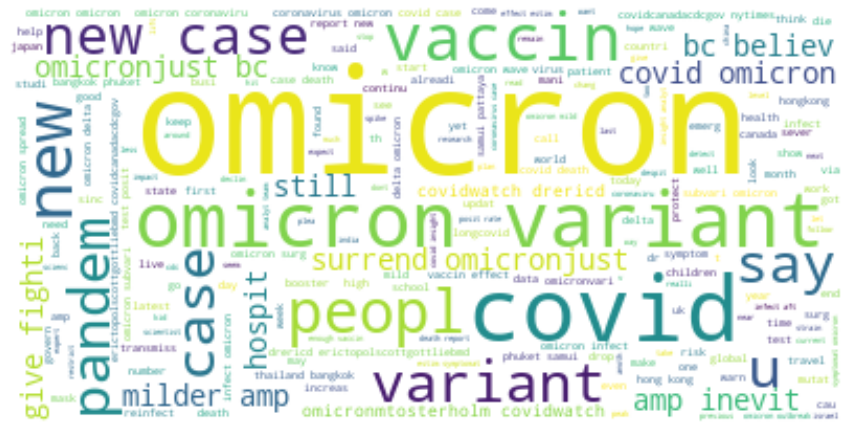

In [17]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

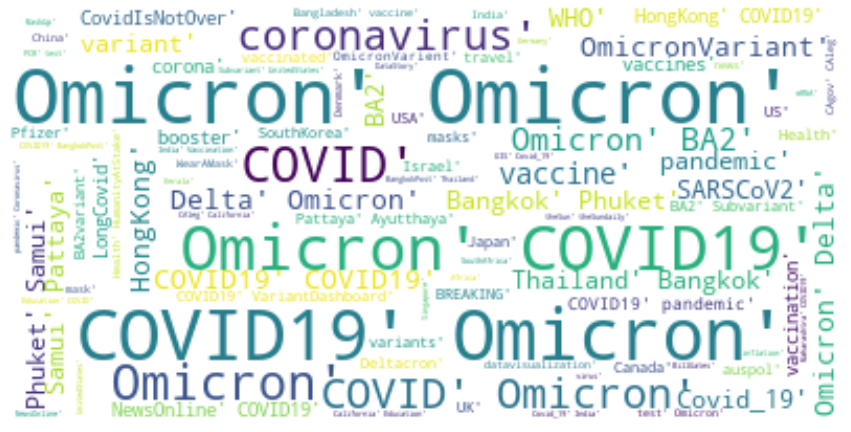

In [18]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 text  Positive  Negative  \
1   yaschamounk cdc say number fulli vaccin omicro...     0.126       0.0   
4    winterolymp alreadi underway us olympian look...     0.000       0.0   
5   doctor help discov omicron say pressur reveal ...     0.213       0.0   
8   month tonga final   singl  doubl tappeda sickn...     0.000       0.0   
11  covid pandem continu ukrain case rapid rise du...     0.000       0.0   
12  covid europeanunion notif new case still high ...     0.000       0.0   
17     omicron declin prompt rethink  measur  via wsj     0.000       0.0   
19  latest custom feedback manag daili  thank luci...     0.200       0.0   
23  genom surveil  variant predomin delta  omicron …      0.000       0.0   
24  peopl wprior  infect vaccin tcellimmunerespons...     0.000       0.0   

    Neutral  
1     0.874  
4     1.000  
5     0.787  
8     1.000  
11    1.000  
12    1.000  
17    1.000  
19    0.800  
23    1.000  
24    1.000 

In [74]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the opinions were Neutral, which means that people were sharing information about the Omicron variant instead of sharing any positive or negative opinions.